In [ ]:
# Patrick Mazza


#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

In [2]:
#putting in the titanic train dataset into pandas dataframe
train = pd.read_csv('titanictrain.csv')

In [3]:
#prints the first n rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Observation and filling in missing data
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

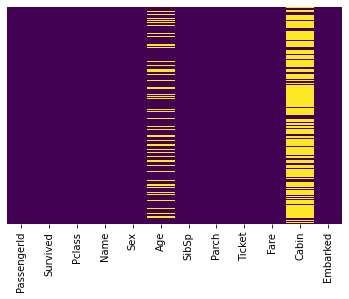

In [5]:
#this heat map shows all of the missing values that are present in the dataset
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

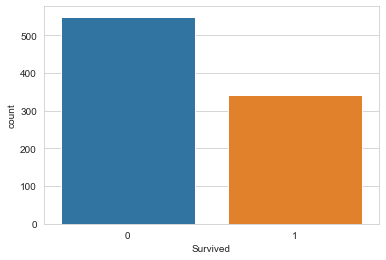

In [6]:
#sets up the style of the chart and plots 'survived' column 
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

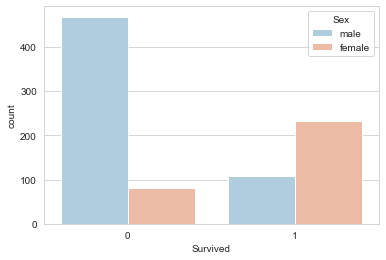

In [7]:
#plots 'survived' and 'sex' columns
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

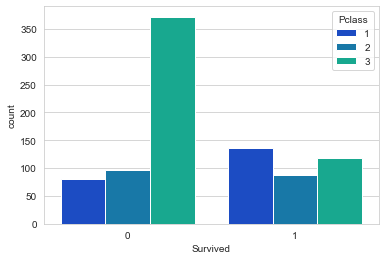

In [8]:
#plots 'survived' and 'pclass' (ticket class) columns
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='winter')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

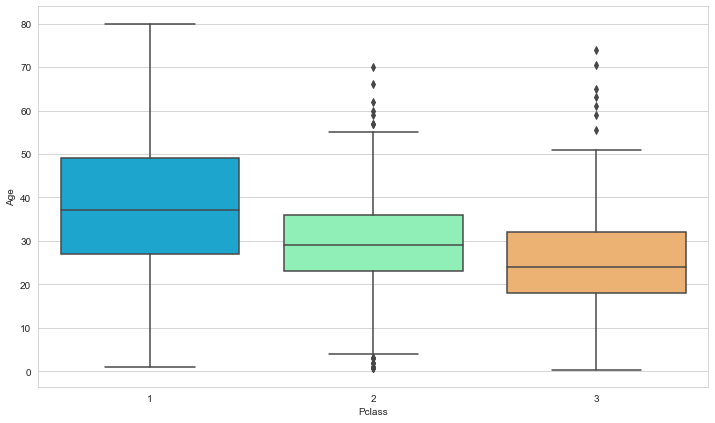

In [9]:
#Here we want to filling in missing age data rather then just dropping the row entirely. We also want to check 
# the averages of age by passanger class for a more accurate sense of the data
plt.figure(figsize=(12,7))
sns.boxplot(x= 'Pclass', y= 'Age', data= train, palette= 'rainbow')

In [10]:
#using the values found in the boxplot above we fill in the missing values- class 1 mean age is 37, class 2 mean age is 29, and class 3 mean age is 24
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [11]:
#This applies the function described above
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

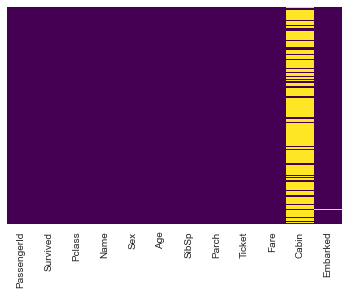

In [12]:
#Checking the heat map
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
#This drops the cabin function due to the fact that there are so many missing values
train.drop('Cabin',axis=1,inplace=True)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
#this function dropped all null values
train.dropna(inplace=True)

<AxesSubplot:>

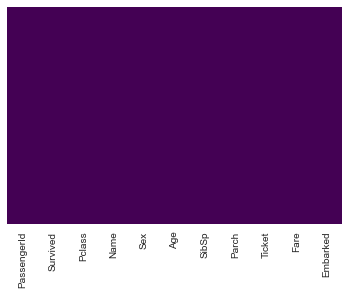

In [16]:
#Checks heatmap just to make sure the dataset is clean
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
#Displays the info for the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [18]:
#converts categorical features to dummy variables
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [19]:
#initializes sex and embark
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [20]:
#Drops Sex, Embarked, name, and ticket in train
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [22]:
#concatanatesthe data for train, sex, and embark
train = pd.concat([train,sex,embark],axis=1)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
#train-test split
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [25]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [26]:
#Training and Predicting
from sklearn.model_selection import train_test_split

In [27]:
#Drops the Survived data for the x and y, train and test data
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [28]:
#This impliments classification from sklearn library
from sklearn.linear_model import LogisticRegression

In [29]:
#This runs the the logistic regression model for 1000 iterations. Previously, this function ran into issues because 
#the loop would never end which is why the max_iter was impliented
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [30]:
#This initializes the predictions for the logmodel with the X_test in the argument
predictions = logmodel.predict(X_test)

In [31]:
#This imports the confusion matrix from sklearn so we can get the accuracy for our model
from sklearn.metrics import confusion_matrix

In [32]:
#initializes accuracy
accuracy=confusion_matrix(y_test,predictions)

In [33]:
#Displays accuracy
accuracy

array([[149,  14],
       [ 33,  71]])

In [34]:
#This function imports the acccuracy score from sklearn 
from sklearn.metrics import accuracy_score

In [35]:
#calculates accuracy
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8239700374531835

In [40]:
#initializing prediction dataframe
dfprediction = pd.Series(predictions).to_frame(name = "predictions")

In [37]:
#imports from the array 
from sklearn.metrics import classification_report

In [38]:
#Displays the classfication report from the optimized model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [42]:
#Turns the output into a csv file for kaggle submission
dfprediction.to_csv('titanic_output.csv',index = False)